<a href="https://colab.research.google.com/github/betulnesibe/greenhouse_gas_emissions/blob/main/greenhouse_gas_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Greenhouse Gas Emissions in the World

##Importing Libraries

In [ ]:
!pip install opendatasets
!pip install bar_chart_race
!pip install countrygroups

In [2]:
#importing the dataset
import opendatasets as od
from pathlib import Path

#dataset arrangements
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import bar_chart_race as bcr
from plotly.offline import iplot

#additional dataset
from countrygroups import EUROPEAN_UNION, ARAB_GROUP, LLDC, LDC, EIG, BRICS, OECD #https://pypi.org/project/countrygroups/

##Importing and Arranging Datasets

In [3]:
od.download("https://www.kaggle.com/ankanhore545/all-greenhouse-gas-emissions-in-the-world") #main dataset

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: betulnesibe
Your Kaggle Key: ··········
Your Kaggle Key: ··········


100%|██████████| 15.9k/15.9k [00:00<00:00, 6.46MB/s]

In [4]:
#Reading the main dataset and checking its first 5 lines
df_dir=Path("/content/all-greenhouse-gas-emissions-in-the-world/ALL GHG_historical_emissions.csv")
df=pd.read_csv(df_dir)
df.head()

Country Data source                Sector      Gas    Unit  \
0                World        CAIT  Total including LUCF  All GHG  MtCO₂e   
1                China        CAIT  Total including LUCF  All GHG  MtCO₂e   
2        United States        CAIT  Total including LUCF  All GHG  MtCO₂e   
3                India        CAIT  Total including LUCF  All GHG  MtCO₂e   
4  European Union (27)        CAIT  Total including LUCF  All GHG  MtCO₂e   

       2018      2017      2016      2015      2014  ...      1999      1998  \
0  48939.71  47990.47  47413.95  46760.47  46647.29  ...  34948.94  34929.19   
1  11705.81  11408.26  11207.66  11149.68  11155.76  ...   4053.37   4103.23   
2   5794.35   5613.64   5676.92   5586.69   5711.15  ...   6291.25   6293.80   
3   3346.63   3202.82   3073.24   3002.17   2988.34  ...   1460.24   1382.26   
4   3333.16   3401.95   3387.97   3046.38   2990.49  ...   3934.85   4008.29   

       1997      1996      1995      1994      1993      1992      1991  \
0  35387.89  34068.91  33703.46  32977.47  32766.49  32670.32  32813.46   
1   3963.61   3954.75   3918.30   3528.81   3377.79   3154.54   3023.38   
2   6258.47   6010.62   5843.90   5782.20   5691.26   5583.80   5501.92   
3   1348.09   1289.63   1240.44   1174.78   1128.44   1096.71   1064.49   
4   4048.58   4126.40   4018.79   3968.32   3984.95   4058.11   4202.13   

       1990  
0  32645.91  
1   2873.71  
2   5543.47  
3   1009.44  
4   4279.18  

[5 rows x 34 columns]

In [5]:
df.shape

(195, 34)

In [6]:
df.iloc[:,:].nunique() #checking if the data source, sector, gas, unit columns have any unique values

Country        195
Data source      1
Sector           1
Gas              1
Unit             1
2018           190
2017           190
2016           191
2015           193
2014           193
2013           193
2012           192
2011           193
2010           191
2009           193
2008           193
2007           192
2006           190
2005           193
2004           194
2003           194
2002           192
2001           191
2000           194
1999           192
1998           192
1997           189
1996           188
1995           192
1994           193
1993           191
1992           193
1991           192
1990           190
dtype: int64

In [7]:
df = df.drop(['Data source','Sector','Gas','Unit'], axis = 1) #since there is no unique values in these colums these columns are dropped
df.head(7)

Country      2018      2017      2016      2015      2014  \
0                World  48939.71  47990.47  47413.95  46760.47  46647.29   
1                China  11705.81  11408.26  11207.66  11149.68  11155.76   
2        United States   5794.35   5613.64   5676.92   5586.69   5711.15   
3                India   3346.63   3202.82   3073.24   3002.17   2988.34   
4  European Union (27)   3333.16   3401.95   3387.97   3046.38   2990.49   
5               Russia   1992.08   1939.26   1918.26   1791.21   1841.26   
6            Indonesia   1703.86   1466.05   1453.23   2070.24   2016.28   

       2013      2012      2011      2010  ...      1999      1998      1997  \
0  46047.13  45427.61  44891.40  44758.58  ...  34948.94  34929.19  35387.89   
1  11144.76  10690.04  10364.83   9872.37  ...   4053.37   4103.23   3963.61   
2   5690.79   5550.87   5796.78   6041.59  ...   6291.25   6293.80   6258.47   
3   2816.49   2758.53   2610.32   2576.93  ...   1460.24   1382.26   1348.09   
4   3136.34   3213.21   3274.40   3646.50  ...   3934.85   4008.29   4048.58   
5   1844.48   1886.41   1864.86   1690.93  ...   1772.68   1740.23   1755.59   
6   1636.17   1695.27   1675.72   1125.25  ...   1261.56   1373.56   2142.82   

       1996      1995      1994      1993      1992      1991      1990  
0  34068.91  33703.46  32977.47  32766.49  32670.32  32813.46  32645.91  
1   3954.75   3918.30   3528.81   3377.79   3154.54   3023.38   2873.71  
2   6010.62   5843.90   5782.20   5691.26   5583.80   5501.92   5543.47  
3   1289.63   1240.44   1174.78   1128.44   1096.71   1064.49   1009.44  
4   4126.40   4018.79   3968.32   3984.95   4058.11   4202.13   4279.18  
5   1889.18   1930.88   2011.47   2294.62   2551.94   2788.70   2885.12  
6   1179.00   1360.88   1327.87   1311.27   1295.01   1274.43   1257.10  

[7 rows x 30 columns]

In [8]:
df = df.replace("Czech Republic","Czechia") #since the official name is changed the dataset column name is changed

In [9]:
world_total=df.iloc[[0]]
df = df.drop(df.index[[0]])
df = df.drop(df.index[[3]])
df.head()

Country      2018      2017      2016      2015      2014      2013  \
1          China  11705.81  11408.26  11207.66  11149.68  11155.76  11144.76   
2  United States   5794.35   5613.64   5676.92   5586.69   5711.15   5690.79   
3          India   3346.63   3202.82   3073.24   3002.17   2988.34   2816.49   
5         Russia   1992.08   1939.26   1918.26   1791.21   1841.26   1844.48   
6      Indonesia   1703.86   1466.05   1453.23   2070.24   2016.28   1636.17   

       2012      2011     2010  ...     1999     1998     1997     1996  \
1  10690.04  10364.83  9872.37  ...  4053.37  4103.23  3963.61  3954.75   
2   5550.87   5796.78  6041.59  ...  6291.25  6293.80  6258.47  6010.62   
3   2758.53   2610.32  2576.93  ...  1460.24  1382.26  1348.09  1289.63   
5   1886.41   1864.86  1690.93  ...  1772.68  1740.23  1755.59  1889.18   
6   1695.27   1675.72  1125.25  ...  1261.56  1373.56  2142.82  1179.00   

      1995     1994     1993     1992     1991     1990  
1  3918.30  3528.81  3377.79  3154.54  3023.38  2873.71  
2  5843.90  5782.20  5691.26  5583.80  5501.92  5543.47  
3  1240.44  1174.78  1128.44  1096.71  1064.49  1009.44  
5  1930.88  2011.47  2294.62  2551.94  2788.70  2885.12  
6  1360.88  1327.87  1311.27  1295.01  1274.43  1257.10  

[5 rows x 30 columns]

In [10]:
world_total

Country      2018      2017      2016      2015      2014      2013  \
0   World  48939.71  47990.47  47413.95  46760.47  46647.29  46047.13   

       2012     2011      2010  ...      1999      1998      1997      1996  \
0  45427.61  44891.4  44758.58  ...  34948.94  34929.19  35387.89  34068.91   

       1995      1994      1993      1992      1991      1990  
0  33703.46  32977.47  32766.49  32670.32  32813.46  32645.91  

[1 rows x 30 columns]

##Creating Bar Chart Race for Different Country Groups 

###Setting the country groups

In [11]:
#Creating sets consisting of differently grouped countries
eu_set=set(EUROPEAN_UNION.names)

arab_set=set(ARAB_GROUP.names)
arab_set.remove("Palestine") #we have to delete it since it was not in the dataset

eig_set=set(EIG.names)#environmental integrity group 
eig_set.remove("Monaco") #we have to delete it since it was not in the dataset

brics_set=set(BRICS.names) #brazil, russia, india, china, and south africa

oecd_set=set(OECD.names) #organisation for economic co-operation and development
oecd_set.remove("USA") #name is different in two datasets, changing it into the main one's form
oecd_set.add("United States")

###Arranging the main dataframe to fit into the function

In [12]:
#making the dataframe ready for the bar_chart_race
bcr_df=df.T #taking transpose to have countries at top and years as rows
bcr_df.rename(columns=bcr_df.iloc[0], inplace = True) #renaming column names to country names
bcr_df.drop(bcr_df.index[0], inplace = True) #dropping the column where country names were
bcr_df=bcr_df.reindex(index=bcr_df.index[::-1]) #reversing the years from past to 2018
bcr_df.head() #controlling the changes


China United States    India   Russia Indonesia   Brazil    Japan  \
1990  2873.71       5543.47  1009.44  2885.12    1257.1  1642.29  1109.37   
1991  3023.38       5501.92  1064.49   2788.7   1274.43  1669.56  1123.86   
1992  3154.54        5583.8  1096.71  2551.94   1295.01   1679.5  1137.15   
1993  3377.79       5691.26  1128.44  2294.62   1311.27   1689.7  1129.63   
1994  3528.81        5782.2  1174.78  2011.47   1327.87  1706.03  1186.79   

        Iran  Germany  Canada  ...  Fiji Micronesia Marshall Islands Dominica  \
1990  240.54  1109.28  626.36  ... -0.72        NaN              NaN     0.24   
1991  280.88  1079.69  622.29  ...  -0.7      -0.02             0.03     0.24   
1992  301.84  1032.01  638.22  ... -0.65       0.09             0.11     0.26   
1993  300.14  1024.31  636.25  ... -0.59       0.09             0.11     0.26   
1994  332.67  1011.41  656.82  ... -0.54        0.1             0.12     0.26   

     Liechtenstein Kiribati Cook Islands Nauru Tuvalu  Niue  
1990          0.25     0.04         0.03  0.13   0.02  0.01  
1991          0.25     0.04         0.03  0.13   0.02  0.01  
1992          0.26     0.04         0.03  0.13   0.02  0.01  
1993          0.26     0.05         0.03  0.12   0.02  0.01  
1994          0.25     0.04         0.03  0.12   0.02  0.01  

[5 rows x 193 columns]

In [13]:
bcr_df = bcr_df.apply(pd.to_numeric) #changing the data types of columns from object to float 
bcr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Columns: 193 entries, China to Niue
dtypes: float64(193)
memory usage: 44.0+ KB


###Racing bar charts

In [14]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,eu_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 900,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.2*len(eu_set),0.2*len(eu_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of European Union Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [15]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,arab_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 900,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.2*len(arab_set),0.2*len(arab_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of Arab Group Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [16]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,eig_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 900,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.8*len(eig_set),0.8*len(eig_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of\nEnvironmental Integrity Group Countries',
    title_size=8,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [17]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,brics_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 900,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(0.8*len(brics_set),0.8*len(brics_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of BRICS Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [18]:
bcr.bar_chart_race(
    df=bcr_df.loc[:,oecd_set],
    filename=None,
    orientation='h',
    sort='desc',
    #n_bars= default is all,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 900,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(6,0.2*len(oecd_set)), #default (6,3.5)
    cmap='dark24',
    title='Greenhouse Gas Emissions of OECD Countries',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

In [19]:
bcr.bar_chart_race(
    df=bcr_df,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars= 10,
    fixed_order=False,
    fixed_max=True,
    #steps_per_period= default is 10
    period_length= 900,
    #interpolate_period= default false
    label_bars=True,
    bar_size=.90, #default .95
    period_label={'x':.99, 'y':.1,'ha':'right','va':'center'},
    #period_summary_func=
    figsize=(6,0.2*10), #default (6,3.5)
    cmap='dark24',
    title='Top 10 Countries with\nthe Highest Greenhouse Gas Emissions',
    title_size=10,
    bar_label_size=7.5,
    tick_label_size=7.5,
    shared_fontdict={'weight':'bold'},
    scale='linear',
    fig=None,
    bar_kwargs={'alpha':.7},
    filter_column_colors=True,
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 130 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 131 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 132 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 133 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

##Turkey's data over the years

In [20]:
years = bcr_df.index.values.tolist() #creating a list consisting of all the years in the main df

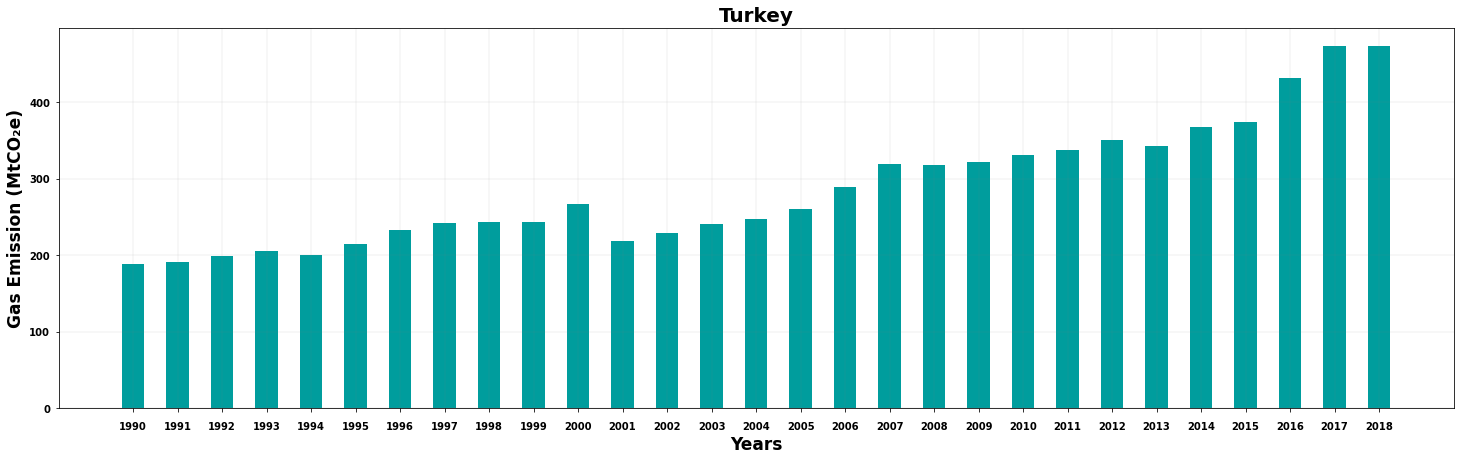

In [21]:
gas_emissions = bcr_df["Turkey"] #taking the values of the Turkey

fig,ax =plt.subplots(figsize=(25,7))
bar1=ax.bar(years, gas_emissions, align='center', width=0.5, color="#009D9D")

ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 5)

ax.grid(b=True,color="grey",linewidth=0.3, alpha=0.4)

plt.xlabel("Years", fontsize=17, fontweight='bold')
plt.ylabel("Gas Emission (MtCO₂e)", fontsize=17, fontweight='bold')
plt.title("Turkey", fontsize=20, fontweight='bold')

plt.show()

##Showing Greenhouse Gas Emissions of Countries on a Map

In [22]:
df.head()

Country      2018      2017      2016      2015      2014      2013  \
1          China  11705.81  11408.26  11207.66  11149.68  11155.76  11144.76   
2  United States   5794.35   5613.64   5676.92   5586.69   5711.15   5690.79   
3          India   3346.63   3202.82   3073.24   3002.17   2988.34   2816.49   
5         Russia   1992.08   1939.26   1918.26   1791.21   1841.26   1844.48   
6      Indonesia   1703.86   1466.05   1453.23   2070.24   2016.28   1636.17   

       2012      2011     2010  ...     1999     1998     1997     1996  \
1  10690.04  10364.83  9872.37  ...  4053.37  4103.23  3963.61  3954.75   
2   5550.87   5796.78  6041.59  ...  6291.25  6293.80  6258.47  6010.62   
3   2758.53   2610.32  2576.93  ...  1460.24  1382.26  1348.09  1289.63   
5   1886.41   1864.86  1690.93  ...  1772.68  1740.23  1755.59  1889.18   
6   1695.27   1675.72  1125.25  ...  1261.56  1373.56  2142.82  1179.00   

      1995     1994     1993     1992     1991     1990  
1  3918.30  3528.81  3377.79  3154.54  3023.38  2873.71  
2  5843.90  5782.20  5691.26  5583.80  5501.92  5543.47  
3  1240.44  1174.78  1128.44  1096.71  1064.49  1009.44  
5  1930.88  2011.47  2294.62  2551.94  2788.70  2885.12  
6  1360.88  1327.87  1311.27  1295.01  1274.43  1257.10  

[5 rows x 30 columns]

###Creating a new dataframe for mapping

In [23]:
division=world_total["1990"].iloc[0]
print(type(division))
my_copy=df.copy()
my_copy["ratio"]=my_copy["1990"].div(division)
my_copy.head()

<class 'numpy.float64'>


Country      2018      2017      2016      2015      2014      2013  \
1          China  11705.81  11408.26  11207.66  11149.68  11155.76  11144.76   
2  United States   5794.35   5613.64   5676.92   5586.69   5711.15   5690.79   
3          India   3346.63   3202.82   3073.24   3002.17   2988.34   2816.49   
5         Russia   1992.08   1939.26   1918.26   1791.21   1841.26   1844.48   
6      Indonesia   1703.86   1466.05   1453.23   2070.24   2016.28   1636.17   

       2012      2011     2010  ...     1998     1997     1996     1995  \
1  10690.04  10364.83  9872.37  ...  4103.23  3963.61  3954.75  3918.30   
2   5550.87   5796.78  6041.59  ...  6293.80  6258.47  6010.62  5843.90   
3   2758.53   2610.32  2576.93  ...  1382.26  1348.09  1289.63  1240.44   
5   1886.41   1864.86  1690.93  ...  1740.23  1755.59  1889.18  1930.88   
6   1695.27   1675.72  1125.25  ...  1373.56  2142.82  1179.00  1360.88   

      1994     1993     1992     1991     1990     ratio  
1  3528.81  3377.79  3154.54  3023.38  2873.71  0.088027  
2  5782.20  5691.26  5583.80  5501.92  5543.47  0.169806  
3  1174.78  1128.44  1096.71  1064.49  1009.44  0.030921  
5  2011.47  2294.62  2551.94  2788.70  2885.12  0.088376  
6  1327.87  1311.27  1295.01  1274.43  1257.10  0.038507  

[5 rows x 31 columns]

In [24]:
colorscale = [[0, 'rgb(51,160,44)'], 
            [0.5, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']]

data_bal = []

data_1990 = [dict(type='choropleth',
                autocolorscale = False,
                colorscale=colorscale,
                locations = df['Country'],
                z = df["1990"],
                locationmode = 'country names',
                marker = dict(line = dict(color = 'rgb(255,255,255)',
                                          width = 2)),
                visible = True,
                colorbar = {'title':'Greenhouse Gas Emission (MtCO₂e)'})]


data_bal.extend(data_1990)

for i in years[1:]:
    data_upd = [dict(type='choropleth',
                      autocolorscale = False,
                      colorscale=colorscale,
                      locations = df['Country'],
                      z = df[i],
                      locationmode = 'country names',
                      marker = dict(line = dict(color = 'rgb(255,255,255)',
                                                width = 2)),
                      visible = False,
                      colorbar = {'title':'Greenhouse Gas Emission (MtCO₂e)'})]
    
    data_bal.extend(data_upd)


# set menues inside the plot
steps = []
yr = 0
for i in range(0,len(data_bal)):
    step = dict(method = "restyle",
                args = ["visible", [False]*len(data_bal)],
                label = years[yr]) 
    step['args'][1][i] = True
    steps.append(step)
    yr += 1

sliders = [dict(active = 10,
                currentvalue = {"prefix": "Year: "},
                pad = {"t": 50},
                steps = steps)]

# Set the layout
layout = dict(title = 'Greenhouse Gas Emissions of Countries',
              geo = dict(scope='world',
                         projection=dict( type='orthographic' ),
                         showlakes = True,
                         lakecolor = 'rgb(255, 255, 255)'),
              sliders = sliders)

fig = dict(data=data_bal, layout=layout)
iplot( fig)



In [25]:
colorscale = [[0, 'rgb(51,160,44)'], 
            [0.5, 'rgb(255,255,0)'], 
            [1, 'rgb(227,26,28)']]
pd.options.display.float_format = '{:.3f}'.format

data_bal = []

df
data_1990 = [dict(type='choropleth',
                autocolorscale = False,
                colorscale=colorscale,
                locations = df['Country'],
                z = df["1990"]/world_total["1990"].iloc[0]*100,
                locationmode = 'country names',
                marker = dict(line = dict(color = 'rgb(255,255,255)',
                                          width = 2)),
                visible = True,
                colorbar = {'title':'Greenhouse Gas Emission Ratio'})]


data_bal.extend(data_1990)

for i in years[1:]:
    data_upd = [dict(type='choropleth',
                      autocolorscale = False,
                      colorscale=colorscale,
                      locations = df['Country'],
                      z = df[i]/world_total["1990"].iloc[0]*100,
                      locationmode = 'country names',
                      marker = dict(line = dict(color = 'rgb(255,255,255)',
                                                width = 2)),
                      visible = False,
                      colorbar = {'title':'Greenhouse Gas Emission Ratio'})]
    
    data_bal.extend(data_upd)


# set menues inside the plot
steps = []
yr = 0
for i in range(0,len(data_bal)):
    step = dict(method = "restyle",
                args = ["visible", [False]*len(data_bal)],
                label = years[yr]) 
    step['args'][1][i] = True
    steps.append(step)
    yr += 1

sliders = [dict(active = 10,
                currentvalue = {"prefix": "Year: "},
                pad = {"t": 50},
                steps = steps)]

# Set the layout
layout = dict(title = 'The Distribution of Greenhouse Gas Emissions in the World',
              geo = dict(scope='world',
                         projection=dict( type='orthographic' ),
                         showlakes = True,
                         lakecolor = 'rgb(255, 255, 255)'),
                         sliders = sliders)

fig = dict(data=data_bal, layout=layout)
iplot( fig)

